# ELG 5142 Ubiquitous Sensing for Smart Cities
## Assignment 3

In this assignment we are given a bunch of time series data that are collected from “ Qbot-Qdrone Leader-follower Demo” from AVRS research studio.
The dataset is a 2 minutes experiment, contains the X and Y coordinates for the follower and the leader.

In this project we use Pycaret library, which is an open-source machine learning library with different machine learning models.

We use 4 different unsupervised machine learning models:
1. SVM (binary)
2. KNN (unsupervised implementation)
3. PCA
4. DBSCAN


And then we plot the TSNE plots for each algorithm, and evaluate the algorithms by compare its output with the actual output, and compare the algorithms with respect to accuracy, precision, recall, and F1 scores.

In [ ]:
!pip install pycaret[full]
!pip uninstall Jinja2 --yes
!pip install Jinja2
#you have to restart runtime after this cell 

In [ ]:
# !pip uninstall Jinja2 --yes

In [ ]:
import pycaret
pycaret.__version__

'2.3.10'

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
#For Anomaly Detection
from pycaret.anomaly import *
import pandas as pd
from sklearn.metrics import classification_report 
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Generate the confusion matrix
def conf_matrix(y_testt, y_predd):
    cf_matrix_ = confusion_matrix(y_testt, y_predd)
    
    print(cf_matrix_)

    ax = sns.heatmap(cf_matrix_, annot=True,cmap=plt.cm.Blues)

    ax.set_title('Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    labels = y_testt.values
    sett = set()
    sett.update((labels))
    ax.xaxis.set_ticklabels(sett)
    ax.yaxis.set_ticklabels(sett)

    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [ ]:
from sklearn.manifold import TSNE
# 2D-TSNE
def plot_clusters_tsne(DataPoints, cluster_model, y, title,n=2):
    tsne_obj = TSNE(n_components=2)
    tsne_model = tsne_obj.fit_transform(DataPoints)
    
    plt.figure(figsize=(17,6))


    plt.subplot(1,2,1)
    for clstr in range(2):
        x_points = tsne_model[cluster_model.predict(DataPoints) == clstr, 0]
        y_points = tsne_model[cluster_model.predict(DataPoints) == clstr, 1]
        plt.scatter(x_points, y_points, label="Cluster "+str(clstr+1))
       
    
    plt.title("After Applying "+title)
    plt.xlabel("TSNE1")
    plt.ylabel("TSNE2")
    plt.legend();

In [ ]:
# plot the model results alongside with data
def model_data(model_score,model_anomlies):
    for column in X.columns:
      plt.plot(model_score[column])
      plt.scatter(model_anomlies.index, model_anomlies[column], c='r', marker='o',s=60, alpha=1)
      plt.title(" ".join(column.split('_')))
      plt.show()

## Read Dataset, anomly detection and  dataset and performance_comparison Dataset

In [ ]:
df_anomly = pd.read_csv('/content/drive/MyDrive/smart/Dataset_to_be_used_in_anomaly_detection.csv')
df_eval = pd.read_csv('/content/drive/MyDrive/smart/Dataset_to_be_used_in_performance_comparison.csv')


In [ ]:
df_anomly.head()

Unnamed: 0  Follower_measure_x_follower  Follower_measure_y_follower  \
0           9                    -1.042570                    -0.241098   
1          10                    -1.056986                    -0.245590   
2          11                    -1.071858                    -0.256787   
3          12                    -1.084518                    -0.257502   
4          13                    -0.974811                    -0.105985   

   Leader_measure_x_leader  Leader_measure_y_leader  
0                -1.267957                 0.414568  
1                -1.165454                 0.411869  
2                -1.028780                 0.407472  
3                -0.850609                 0.367564  
4                -0.625045                 0.236174

In [ ]:
df_eval.head()

Unnamed: 0  Follower_measure_x_follower  Follower_measure_y_follower  \
0           9                    -1.042570                    -0.241098   
1          10                    -1.056986                    -0.245590   
2          11                    -1.071858                    -0.256787   
3          12                    -1.084518                    -0.257502   
4          13                    -0.974811                    -0.105985   

   Leader_measure_x_leader  Leader_measure_y_leader  labels  
0                -1.267957                 0.414568       0  
1                -1.165454                 0.411869       0  
2                -1.028780                 0.407472       0  
3                -0.850609                 0.367564       0  
4                -0.625045                 0.236174       0

In [ ]:
X = df_anomly[['Follower_measure_x_follower', 'Follower_measure_y_follower', 'Leader_measure_x_leader', 'Leader_measure_y_leader']]


In [ ]:
X

Follower_measure_x_follower  Follower_measure_y_follower  \
0                     -1.042570                    -0.241098   
1                     -1.056986                    -0.245590   
2                     -1.071858                    -0.256787   
3                     -1.084518                    -0.257502   
4                     -0.974811                    -0.105985   
..                          ...                          ...   
93                    -1.559131                     0.440215   
94                    -1.496434                     0.357878   
95                    -1.467606                     0.253125   
96                    -1.420551                     0.223617   
97                    -1.246517                     0.129141   

    Leader_measure_x_leader  Leader_measure_y_leader  
0                 -1.267957                 0.414568  
1                 -1.165454                 0.411869  
2                 -1.028780                 0.407472  
3                 -0.850609                 0.367564  
4                 -0.625045                 0.236174  
..                      ...                      ...  
93                -2.325538                 0.295837  
94                -2.105013                 0.098846  
95                -1.857816                 0.058397  
96                -1.606946                 0.202749  
97                -1.390368                 0.402667  

[98 rows x 4 columns]

In [ ]:
y_true= df_eval['labels']

In [ ]:
y_true

0     0
1     0
2     0
3     0
4     0
     ..
93    0
94    0
95    0
96    0
97    0
Name: labels, Length: 98, dtype: int64

In [ ]:
reg = setup(data = X)

##SVM

In [ ]:
# train an SVN detector
clf_SVM = create_model('svm')
clf_SVM.fit(X)

# get outlier scores
y_scores_SVM = predict_model(clf_SVM,X)

In [ ]:
y_scores_SVM

Follower_measure_x_follower  Follower_measure_y_follower  \
0                     -1.042570                    -0.241098   
1                     -1.056986                    -0.245590   
2                     -1.071858                    -0.256787   
3                     -1.084518                    -0.257502   
4                     -0.974811                    -0.105985   
..                          ...                          ...   
93                    -1.559131                     0.440215   
94                    -1.496434                     0.357878   
95                    -1.467606                     0.253125   
96                    -1.420551                     0.223617   
97                    -1.246517                     0.129141   

    Leader_measure_x_leader  Leader_measure_y_leader  Anomaly  Anomaly_Score  
0                 -1.267957                 0.414568        0      -0.846592  
1                 -1.165454                 0.411869        0      -0.859350  
2                 -1.028780                 0.407472        0      -0.760461  
3                 -0.850609                 0.367564        0      -0.665501  
4                 -0.625045                 0.236174        0      -0.400389  
..                      ...                      ...      ...            ...  
93                -2.325538                 0.295837        0       4.724686  
94                -2.105013                 0.098846        0       2.402148  
95                -1.857816                 0.058397        0       0.551510  
96                -1.606946                 0.202749        0       0.114175  
97                -1.390368                 0.402667        0       0.224833  

[98 rows x 6 columns]

### TSNE

In [ ]:
plot_model(clf_SVM, plot = 'tsne')

In [ ]:
y_predict_svm = y_scores_SVM['Anomaly']

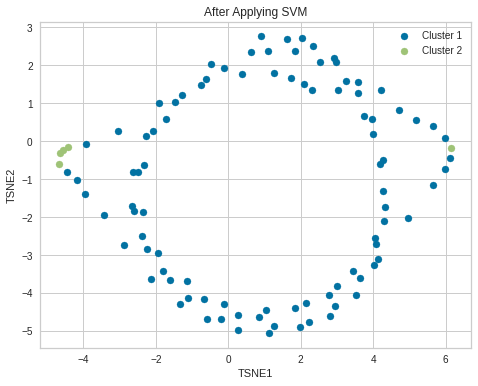

In [ ]:
plot_clusters_tsne(X,clf_SVM,y_predict_svm,'SVM' )

In [ ]:
anomlies_svm = y_scores_SVM[y_scores_SVM['Anomaly']==1]
anomlies_svm

Follower_measure_x_follower  Follower_measure_y_follower  \
31                     0.360847                    -0.459538   
32                     0.432356                    -0.526272   
33                     0.412900                    -0.574391   
34                     0.463492                    -0.562305   
91                    -1.535425                     0.260158   

    Leader_measure_x_leader  Leader_measure_y_leader  Anomaly  Anomaly_Score  
31                 0.767382                -0.489506        1       8.172418  
32                 0.795491                -0.493113        1       8.637892  
33                 0.827058                -0.568237        1       8.695015  
34                 0.734001                -0.737032        1       8.338360  
91                -2.816451                 0.535399        1       7.785698

###  plot the model results alongside with data

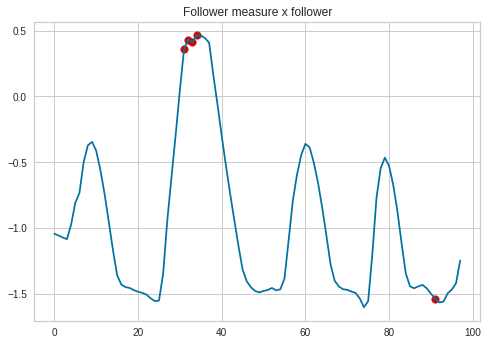

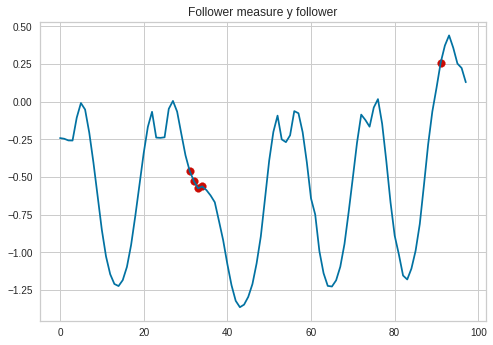

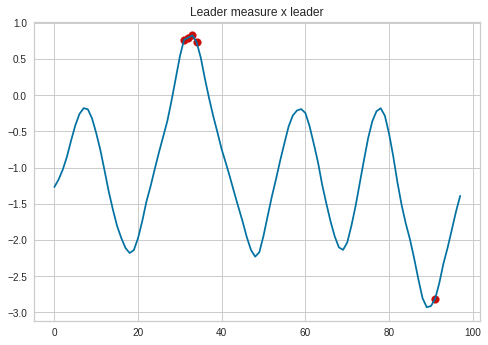

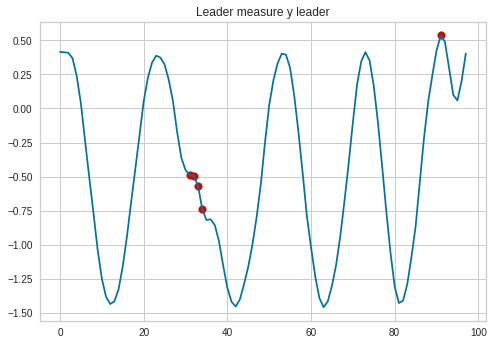

In [ ]:
model_data(y_scores_SVM, anomlies_svm)

In [ ]:
df_anomly.columns

Index(['Unnamed: 0', 'Follower_measure_x_follower',
       'Follower_measure_y_follower', 'Leader_measure_x_leader',
       'Leader_measure_y_leader'],
      dtype='object')

### Model evaluation

#### Accuracy, Percision, Recall, F-score

In [ ]:
# y_predict_svm = y_scores_SVM['Anomaly']
print(classification_report(y_true, y_predict_svm))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        86
           1       1.00      0.42      0.59        12

    accuracy                           0.93        98
   macro avg       0.96      0.71      0.77        98
weighted avg       0.93      0.93      0.92        98



#### Confuison matrix

[[86  0]
 [ 7  5]]


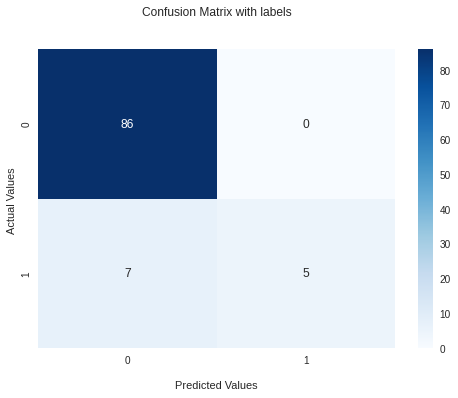

In [ ]:
conf_matrix(y_true, y_predict_svm)

##KNN

In [ ]:
# train an knn detector
clf_knn = create_model('knn')
clf_knn.fit(X)

# get outlier scores
y_scores_knn = predict_model(clf_knn,X)

In [ ]:
y_scores_knn

Follower_measure_x_follower  Follower_measure_y_follower  \
0                     -1.042570                    -0.241098   
1                     -1.056986                    -0.245590   
2                     -1.071858                    -0.256787   
3                     -1.084518                    -0.257502   
4                     -0.974811                    -0.105985   
..                          ...                          ...   
93                    -1.559131                     0.440215   
94                    -1.496434                     0.357878   
95                    -1.467606                     0.253125   
96                    -1.420551                     0.223617   
97                    -1.246517                     0.129141   

    Leader_measure_x_leader  Leader_measure_y_leader  Anomaly  Anomaly_Score  
0                 -1.267957                 0.414568        0       0.440224  
1                 -1.165454                 0.411869        0       0.417015  
2                 -1.028780                 0.407472        0       0.415998  
3                 -0.850609                 0.367564        0       0.364849  
4                 -0.625045                 0.236174        0       0.347260  
..                      ...                      ...      ...            ...  
93                -2.325538                 0.295837        0       0.575646  
94                -2.105013                 0.098846        0       0.632190  
95                -1.857816                 0.058397        0       0.514458  
96                -1.606946                 0.202749        0       0.357775  
97                -1.390368                 0.402667        0       0.360855  

[98 rows x 6 columns]

###TSNE

In [ ]:
plot_model(clf_knn, plot = 'tsne')

In [ ]:
y_predict_knn = y_scores_knn['Anomaly']

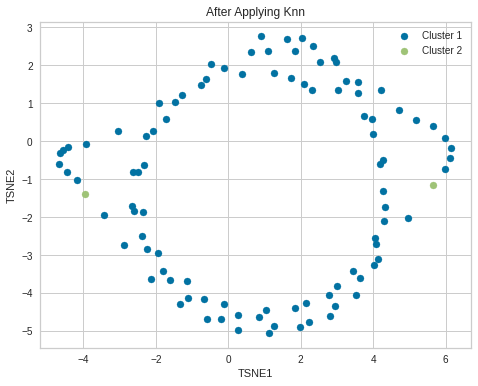

In [ ]:
plot_clusters_tsne(X,clf_knn,y_predict_knn,'Knn' )

### plot the model results alongside with data

In [ ]:
anomlies_knn = y_scores_knn[y_scores_knn['Anomaly']==1]
anomlies_knn

Follower_measure_x_follower  Follower_measure_y_follower  \
37                     0.407215                    -0.667258   
88                    -1.431881                    -0.282536   

    Leader_measure_x_leader  Leader_measure_y_leader  Anomaly  Anomaly_Score  
37                -0.046350                -0.854807        1       0.770708  
88                -2.802852                 0.047603        1       0.737135

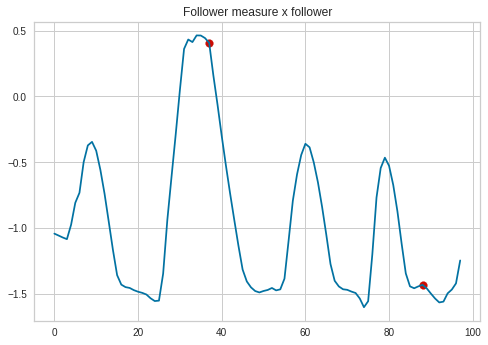

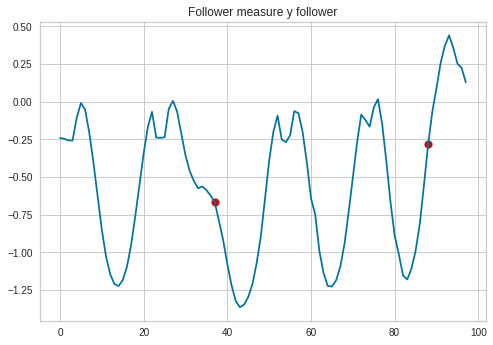

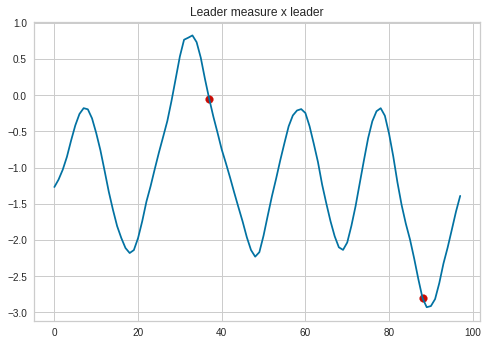

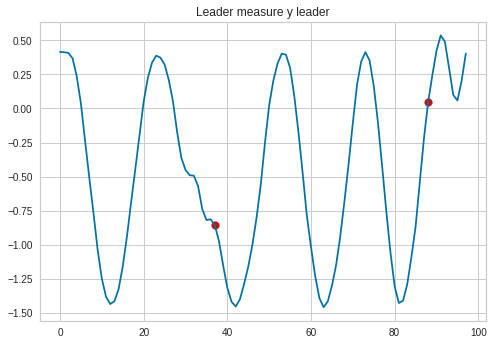

In [ ]:
model_data(y_scores_knn, anomlies_knn)

### Model evaluation

#### Accuracy, Percision, Recall, F-score

In [ ]:
print(classification_report(y_true, y_predict_knn))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93        86
           1       0.50      0.08      0.14        12

    accuracy                           0.88        98
   macro avg       0.69      0.54      0.54        98
weighted avg       0.84      0.88      0.84        98



#### Confuison matrix

[[85  1]
 [11  1]]


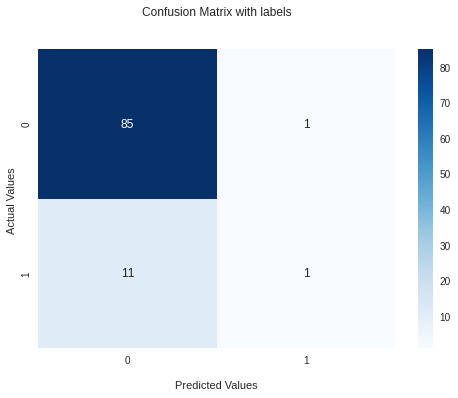

In [ ]:
conf_matrix(y_true, y_predict_knn)

##PCA

In [ ]:
# train a pca detector
clf_pca = create_model('pca')
clf_pca.fit(X)

# get outlier scores
y_scores_pca = predict_model(clf_pca,X)

In [ ]:
y_scores_pca

Follower_measure_x_follower  Follower_measure_y_follower  \
0                     -1.042570                    -0.241098   
1                     -1.056986                    -0.245590   
2                     -1.071858                    -0.256787   
3                     -1.084518                    -0.257502   
4                     -0.974811                    -0.105985   
..                          ...                          ...   
93                    -1.559131                     0.440215   
94                    -1.496434                     0.357878   
95                    -1.467606                     0.253125   
96                    -1.420551                     0.223617   
97                    -1.246517                     0.129141   

    Leader_measure_x_leader  Leader_measure_y_leader  Anomaly  Anomaly_Score  
0                 -1.267957                 0.414568        0     171.243694  
1                 -1.165454                 0.411869        0     171.205230  
2                 -1.028780                 0.407472        0     171.879696  
3                 -0.850609                 0.367564        0     170.120106  
4                 -0.625045                 0.236174        0     163.779860  
..                      ...                      ...      ...            ...  
93                -2.325538                 0.295837        0     249.750584  
94                -2.105013                 0.098846        0     213.680449  
95                -1.857816                 0.058397        0     189.104878  
96                -1.606946                 0.202749        0     189.667836  
97                -1.390368                 0.402667        0     191.816936  

[98 rows x 6 columns]

### TSNE

In [ ]:
plot_model(clf_pca, plot = 'tsne')

In [ ]:
y_predict_pca = y_scores_pca['Anomaly']

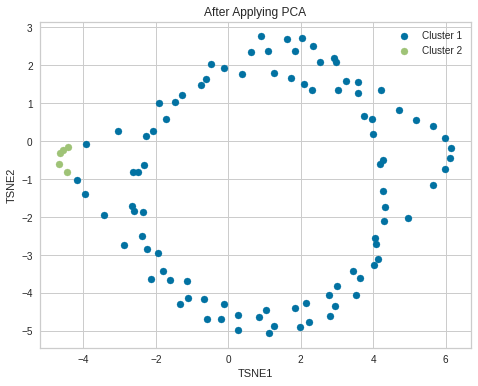

In [ ]:
plot_clusters_tsne(X,clf_pca,y_predict_pca,'PCA' )

### plot the model results alongside with data

In [ ]:
anomlies_pca = y_scores_pca[y_scores_pca['Anomaly']==1]
anomlies_pca

Follower_measure_x_follower  Follower_measure_y_follower  \
31                     0.360847                    -0.459538   
32                     0.432356                    -0.526272   
33                     0.412900                    -0.574391   
34                     0.463492                    -0.562305   
35                     0.462689                    -0.586497   

    Leader_measure_x_leader  Leader_measure_y_leader  Anomaly  Anomaly_Score  
31                 0.767382                -0.489506        1     293.785416  
32                 0.795491                -0.493113        1     304.704645  
33                 0.827058                -0.568237        1     305.129811  
34                 0.734001                -0.737032        1     303.068420  
35                 0.517651                -0.817752        1     290.703766

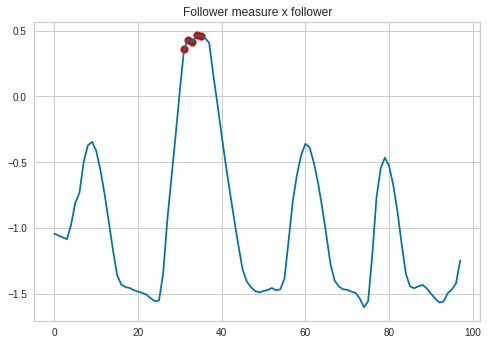

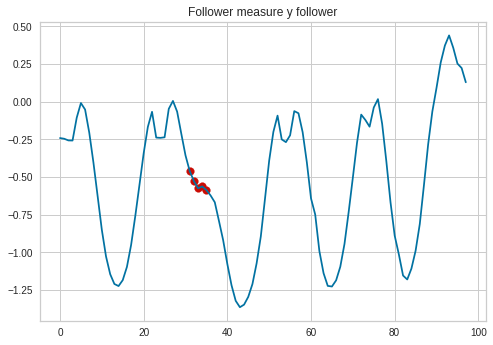

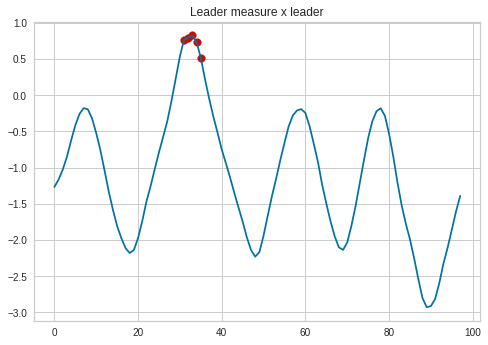

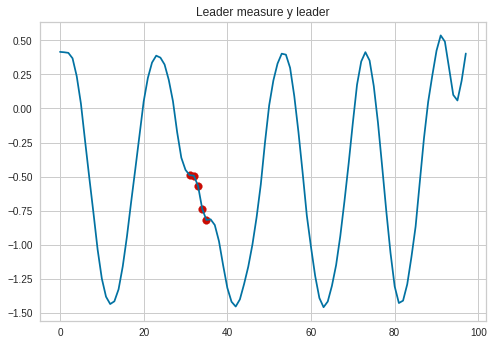

In [ ]:
model_data(y_scores_pca, anomlies_pca)

### Model evaluation

#### Accuracy, Percision, Recall, F-score

In [ ]:
print(classification_report(y_true, y_predict_pca))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        86
           1       1.00      0.42      0.59        12

    accuracy                           0.93        98
   macro avg       0.96      0.71      0.77        98
weighted avg       0.93      0.93      0.92        98



#### Confuison matrix

[[86  0]
 [ 7  5]]


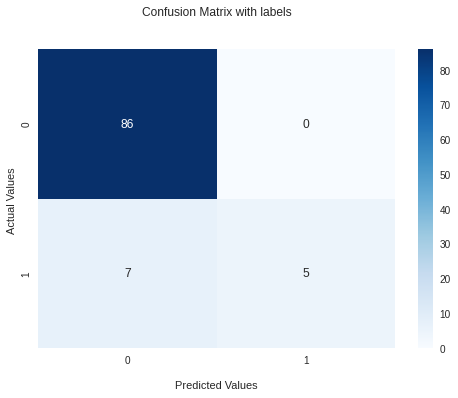

In [ ]:
conf_matrix(y_true, y_predict_pca)

##DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
# train an DBSCAN detector
clf_DB = DBSCAN(eps=0.5, min_samples=9).fit(X)

In [ ]:
clf_DB.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0])

Converted the (-1) to (1)

In [ ]:
for i in range(len(clf_DB.labels_)):
    if clf_DB.labels_[i] == -1:
        clf_DB.labels_[i] = 1
    elif clf_DB.labels_[i] == 0:
        clf_DB.labels_[i] = 0

In [ ]:
y_scores_DB = clf_DB.labels_

### TSNE

In [ ]:
plot_model(clf_DB, plot = 'tsne')

In [ ]:
y_predict_DB = y_scores_DB

In [ ]:
from sklearn.manifold import TSNE

def plot_clusters_tsne_DB(DataPoints, cluster_model, y, title,n=2):
    tsne_obj = TSNE(n_components=2)
    tsne_model = tsne_obj.fit_transform(DataPoints)
    
    plt.figure(figsize=(17,6))
    
    plt.subplot(1,2,1)
    for clstr in range(2):
        x_points = tsne_model[y_scores_DB == clstr, 0]
        y_points = tsne_model[y_scores_DB == clstr, 1]
        plt.scatter(x_points, y_points, label="Cluster "+str(clstr+1))
  
    
    plt.title("After Applying "+title)
    plt.xlabel("TSNE1")
    plt.ylabel("TSNE2")
    plt.legend();

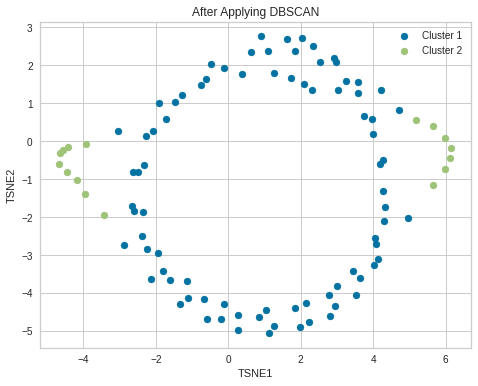

In [ ]:
plot_clusters_tsne_DB(X,clf_DB,y_predict_DB,'DBSCAN')

### plot the model results alongside with data

In [ ]:
X_db = X

In [ ]:
X_db['Anomaly'] = y_scores_DB

In [ ]:
X_db

Follower_measure_x_follower  Follower_measure_y_follower  \
0                     -1.042570                    -0.241098   
1                     -1.056986                    -0.245590   
2                     -1.071858                    -0.256787   
3                     -1.084518                    -0.257502   
4                     -0.974811                    -0.105985   
..                          ...                          ...   
93                    -1.559131                     0.440215   
94                    -1.496434                     0.357878   
95                    -1.467606                     0.253125   
96                    -1.420551                     0.223617   
97                    -1.246517                     0.129141   

    Leader_measure_x_leader  Leader_measure_y_leader  Anomaly  
0                 -1.267957                 0.414568        0  
1                 -1.165454                 0.411869        0  
2                 -1.028780                 0.407472        0  
3                 -0.850609                 0.367564        0  
4                 -0.625045                 0.236174        0  
..                      ...                      ...      ...  
93                -2.325538                 0.295837        1  
94                -2.105013                 0.098846        1  
95                -1.857816                 0.058397        0  
96                -1.606946                 0.202749        0  
97                -1.390368                 0.402667        0  

[98 rows x 5 columns]

In [ ]:
anomlies_db = X_db[X_db['Anomaly']==1]
anomlies_db

Follower_measure_x_follower  Follower_measure_y_follower  \
30                     0.046769                    -0.356131   
31                     0.360847                    -0.459538   
32                     0.432356                    -0.526272   
33                     0.412900                    -0.574391   
34                     0.463492                    -0.562305   
35                     0.462689                    -0.586497   
36                     0.443363                    -0.622341   
37                     0.407215                    -0.667258   
38                     0.160302                    -0.791585   
88                    -1.431881                    -0.282536   
89                    -1.458214                    -0.064960   
90                    -1.498133                     0.092471   
91                    -1.535425                     0.260158   
92                    -1.565423                     0.372923   
93                    -1.559131                     0.440215   
94                    -1.496434                     0.357878   

    Leader_measure_x_leader  Leader_measure_y_leader  Anomaly  
30                 0.536808                -0.450804        1  
31                 0.767382                -0.489506        1  
32                 0.795491                -0.493113        1  
33                 0.827058                -0.568237        1  
34                 0.734001                -0.737032        1  
35                 0.517651                -0.817752        1  
36                 0.224326                -0.813084        1  
37                -0.046350                -0.854807        1  
38                -0.294208                -0.973347        1  
88                -2.802852                 0.047603        1  
89                -2.928637                 0.242762        1  
90                -2.912866                 0.423525        1  
91                -2.816451                 0.535399        1  
92                -2.596673                 0.489932        1  
93                -2.325538                 0.295837        1  
94                -2.105013                 0.098846        1

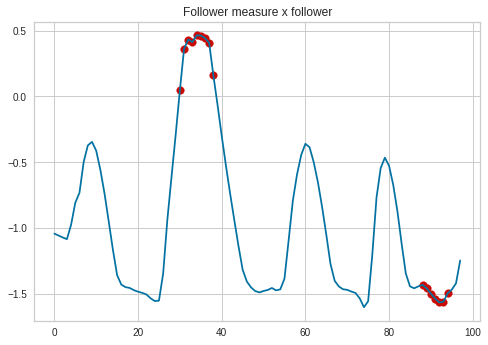

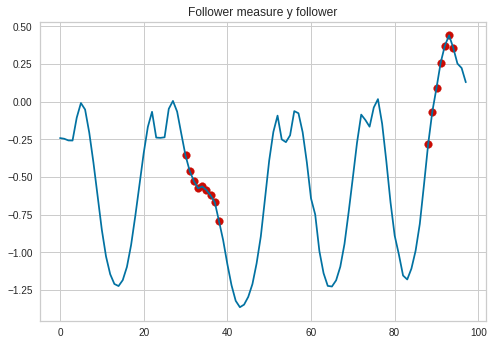

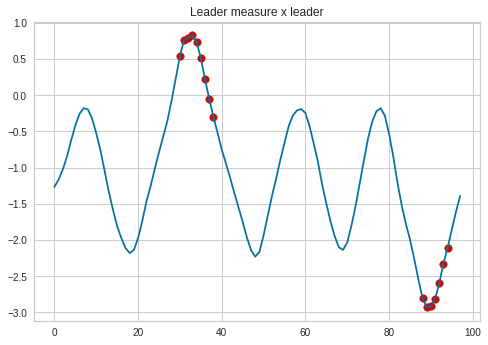

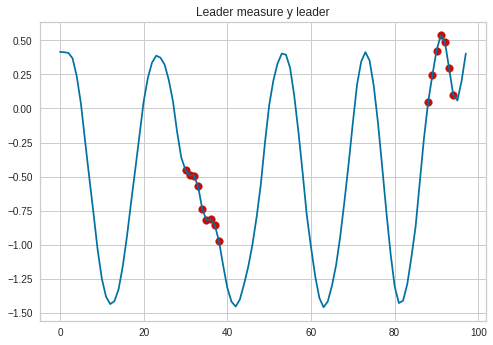

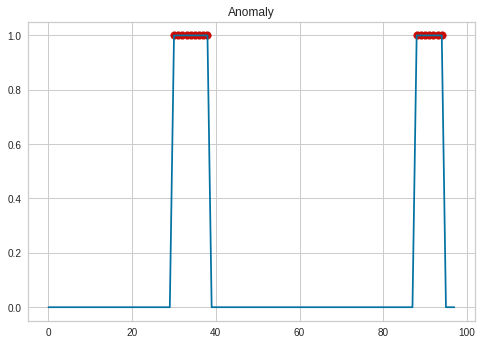

In [ ]:
model_data(X_db, anomlies_db)

### Model evaluation

#### Accuracy, Percision, Recall, F-score

In [ ]:
print(classification_report(y_true, y_predict_DB))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        86
           1       0.69      0.92      0.79        12

    accuracy                           0.94        98
   macro avg       0.84      0.93      0.88        98
weighted avg       0.95      0.94      0.94        98



#### Confision matrix

[[81  5]
 [ 1 11]]


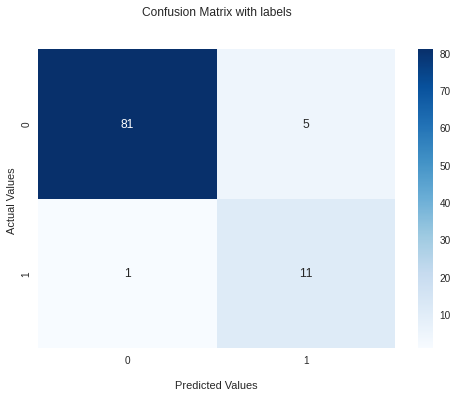

In [ ]:
conf_matrix(y_true, y_predict_DB)